# Testing the TPOT Implementation

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFwe, f_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [3]:
train = pd.read_csv('data/AirQualityUCI/train_no_outliers.csv')
test = pd.read_csv('data/AirQualityUCI/test.csv')
# X_train = train.loc[:, train.columns != 'NO2(GT)']
# X_test = test.loc[:, ~test.columns.isin(['NO2(GT)','Year'])]
# y_train = train['NO2(GT)']
# y_test = test['NO2(GT)']
training_features = train.loc[:, train.columns != 'NO2(GT)']
testing_features = test.loc[:, ~test.columns.isin(['NO2(GT)','Year'])]
training_target = train['NO2(GT)']
testing_target = test['NO2(GT)']

In [4]:
# NOTE: Make sure that the class is labeled 'target' in the data file
# tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
# features = tpot_data.drop('target', axis=1).values
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'].values, random_state=None)
# Average CV score on the training set was:-1301.830295086068
exported_pipeline = make_pipeline(
    SelectFwe(score_func=f_regression, alpha=0.01),
    RandomForestRegressor(bootstrap=False, max_features=0.3, min_samples_leaf=3, min_samples_split=17, n_estimators=100)
)

In [5]:
exported_pipeline.fit(training_features, training_target)

Pipeline(memory=None,
     steps=[('selectfwe', SelectFwe(alpha=0.01, score_func=<function f_regression at 0x0D264A08>)), ('randomforestregressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=...tors=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [6]:
results = exported_pipeline.predict(testing_features)

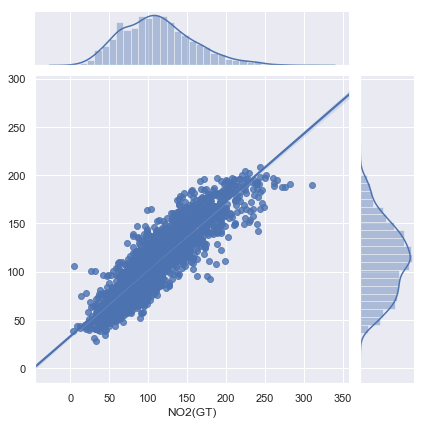

In [10]:
sns.jointplot(x=testing_target,y=results,kind='reg')

## Evaluation Metrics

* Mean Absolute Error
* Mean Squared Error
* Root Mean Squared Error

In [11]:
from sklearn import metrics

In [13]:
metrics.mean_absolute_error(testing_target,results)

15.778396988607492

In [14]:
metrics.mean_squared_error(testing_target,results)

454.7335130381148

In [15]:
np.sqrt(metrics.mean_squared_error(testing_target,results))

21.324481542070718